In [18]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [19]:
# Assuming your data is in a CSV file
data = pd.read_csv("C:\\Users\\nitya\\Desktop\\Notes\\T5\\MLA-II\\CIA2\\data22.csv")

# Display the first few rows of the data
data.head()

,Date,Bill No.,Customer_Id,Particulars,Item_Code,Qty,UOM,Payment Type,Total Amount
0,01-11-2023,735918.0,CB19415,BIODERMA SENSIBIO GEL MOUSSANT CLN FOAM GEL 500M,BSGMCFG5,1.0,BTL,Credit Card,173.00
1,01-11-2023,735919.0,CB17365,QUEST TORTILLA PROTEIN CHIPS CHILLI LIME 32GM,QTPCCL3,1.0,PCS,Credit Card,211.63
2,01-11-2023,735919.0,CB17365,MCD PROTEIN COOKIE BIRTHDAY CAKE BATTER 113GM,MPCBCB1,1.0,PCS,Credit Card,211.63
3,01-11-2023,735919.0,CB17365,PRIDE FOODS RICE N GRINDS STRW BANA 1419GM,PFRNGSB1,1.0,PCS,Credit Card,211.63
4,01-11-2023,735920.0,CB15714,RADIAN ICE GEL TUBE 150ML,RIGT1,1.0,PCS,Cash,42.00


In [20]:
# Check for missing values
data.isnull().sum()

Date            0
Bill No.        0
Customer_Id     0
Particulars     0
Item_Code       0
Qty             0
UOM             0
Payment Type    0
Total Amount    0
dtype: int64

In [21]:
# Convert 'Date' column to datetime type with the specified format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Calculate Recency, Frequency, and Monetary values
snapshot_date = max(data['Date'])
rfm_data = data.groupby('Customer_Id').agg({
    'Date': lambda x: (snapshot_date - x.max()).days,
    'Bill No.': 'count',
    'Total Amount': 'sum'
}).reset_index()

# Rename columns for clarity
rfm_data.columns = ['Customer_Id', 'Recency', 'Frequency', 'Monetary']

rfm_data

,Customer_Id,Recency,Frequency,Monetary
0,CB11000,4,5,1042.46
1,CB11003,5,7,912.38
2,CB11005,8,7,2751.76
3,CB11013,5,5,1633.46
4,CB11021,5,5,529.93
...,...,...,...,...
1675,CB19970,0,5,707.00
1676,CB19977,1,7,1818.05
1677,CB19980,6,3,168.77
1678,CB19988,1,5,313.20


In [22]:
# Create quartiles for Recency, Frequency, and Monetary values
rfm_quartiles = rfm_data[['Recency', 'Frequency', 'Monetary']].apply(
    pd.qcut, q=4, labels=[1, 2, 3, 4]
)

# Add quartile values to the original DataFrame
rfm_data['R'] = rfm_quartiles['Recency']
rfm_data['F'] = rfm_quartiles['Frequency']
rfm_data['M'] = rfm_quartiles['Monetary']

In [23]:
rfm_data

,Customer_Id,Recency,Frequency,Monetary,R,F,M
0,CB11000,4,5,1042.46,2,2,3
1,CB11003,5,7,912.38,2,3,3
2,CB11005,8,7,2751.76,3,3,4
3,CB11013,5,5,1633.46,2,2,3
4,CB11021,5,5,529.93,2,2,2
...,...,...,...,...,...,...,...
1675,CB19970,0,5,707.00,1,2,2
1676,CB19977,1,7,1818.05,1,3,3
1677,CB19980,6,3,168.77,3,1,1
1678,CB19988,1,5,313.20,1,2,2


In [26]:
# Convert quartile columns to numeric type
rfm_data['R'] = pd.to_numeric(rfm_data['R'])
rfm_data['F'] = pd.to_numeric(rfm_data['F'])
rfm_data['M'] = pd.to_numeric(rfm_data['M'])

# Calculate RFM score by combining quartile values
rfm_data['RFM_Score'] = rfm_data['R'] * 0.25 + rfm_data['F'] * 0.45 + rfm_data['M'] * 0.3

In [27]:
rfm_data

,Customer_Id,Recency,Frequency,Monetary,R,F,M,RFM_Score
0,CB11000,4,5,1042.46,2,2,3,2.30
1,CB11003,5,7,912.38,2,3,3,2.75
2,CB11005,8,7,2751.76,3,3,4,3.30
3,CB11013,5,5,1633.46,2,2,3,2.30
4,CB11021,5,5,529.93,2,2,2,2.00
...,...,...,...,...,...,...,...,...
1675,CB19970,0,5,707.00,1,2,2,1.75
1676,CB19977,1,7,1818.05,1,3,3,2.50
1677,CB19980,6,3,168.77,3,1,1,1.50
1678,CB19988,1,5,313.20,1,2,2,1.75


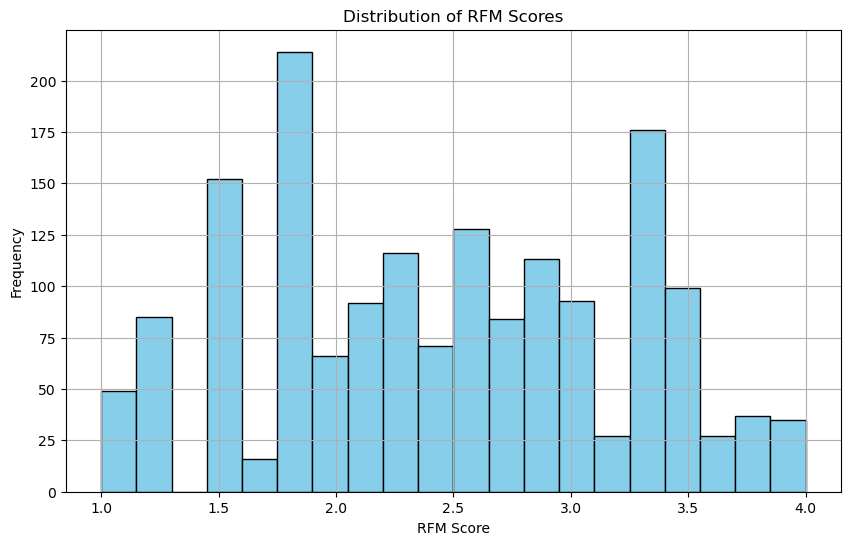

In [28]:
import matplotlib.pyplot as plt

# Plot the distribution of RFM Scores
plt.figure(figsize=(10, 6))
plt.hist(rfm_data['RFM_Score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of RFM Scores')
plt.xlabel('RFM Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [29]:
# Define function to create segments
def segment_customer(rfm_score):
    if rfm_score >= 3.0:
        return 'High-Value'
    elif rfm_score >= 2.0:
        return 'Mid-Value'
    else:
        return 'Low-Value'

# Apply the segmentation function to create a new 'Segment' column
rfm_data['Segment'] = rfm_data['RFM_Score'].apply(segment_customer)

# Display the first few rows of the updated DataFrame
rfm_data.head()

,Customer_Id,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment
0,CB11000,4,5,1042.46,2,2,3,2.30,Mid-Value
1,CB11003,5,7,912.38,2,3,3,2.75,Mid-Value
2,CB11005,8,7,2751.76,3,3,4,3.30,High-Value
3,CB11013,5,5,1633.46,2,2,3,2.30,Mid-Value
4,CB11021,5,5,529.93,2,2,2,2.00,Mid-Value


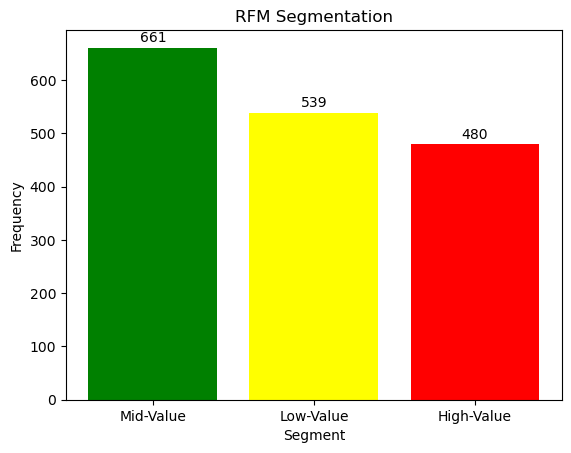

In [31]:
# Calculate the counts of each segment
segment_counts = rfm_data['Segment'].value_counts()

# Plot the frequency of each segment with labels
plt.bar(segment_counts.index, segment_counts.values, color=['green', 'yellow', 'red'])
plt.xlabel('Segment')
plt.ylabel('Frequency')
plt.title('RFM Segmentation')

# Add labels to each bar
for i, value in enumerate(segment_counts.values):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')

plt.show()